

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set is an imbd datasets that contains data about movies, Columns found include 'id','imdb_id','popularity', 'budget','revenue','original_title',
 'cast','director' etc. These columns are cleaned, preprocessed before proper visualization. These visualualization shows the effect of one column on another


### Question(s) for Analysis
- What is the most popular genres
- The most popular studio for production
- What is the distribution of revenue and budges of themovies
- The correlation between the net profit and the Scoring

> Pandas, Numpy and Matplotlib was used in the analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline



In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

>  In this section I loaded in the data, checked for cleanliness, and then trimmed and cleaned the dataset for analysis. 

The data was relatively clean compared to the industry standard data


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
import pandas as pd

pd.set_option('display.float_format', lambda x: '%.3f' % x)

#Loading the dataframe
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.986,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500,2015,137999939.280,1392445892.524
1,76341,tt1392190,28.420,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.100,2015,137999939.280,348161292.489
2,262500,tt2908446,13.113,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.300,2015,101199955.472,271619025.408
3,140607,tt2488496,11.173,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.500,2015,183999919.040,1902723129.802
4,168259,tt2820852,9.335,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.300,2015,174799923.088,1385748801.471


In [4]:
shape = df.shape

print(f'There are {shape[0]} rows and {shape[1]} columns in this Movies Data frame')

There are 10866 rows and 21 columns in this Movies Data frame


In [5]:
#Printing out information stattistics of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning
> From the __df.info__ it can be seen that there are some columns with missing values, each of this column is properly examined before a decision is made to either drop the column, drop the rows with na or fill the NA values with something
 

In [6]:
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.986,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500,2015,137999939.280,1392445892.524
1,76341,tt1392190,28.420,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.100,2015,137999939.280,348161292.489
2,262500,tt2908446,13.113,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.300,2015,101199955.472,271619025.408
3,140607,tt2488496,11.173,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.500,2015,183999919.040,1902723129.802
4,168259,tt2820852,9.335,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.300,2015,174799923.088,1385748801.471
5,281957,tt1663202,9.111,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.200,2015,124199945.352,490314247.022
6,87101,tt1340138,8.654,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.800,2015,142599937.256,405355075.684
7,286217,tt3659388,7.667,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.600,2015,99359956.282,547749654.310
8,211672,tt2293640,7.404,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.500,2015,68079970.045,1064192016.796
9,150540,tt2096673,6.327,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W..

In [7]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
missing= df.homepage.isna().sum()

print(f'There are a total of {missing} values, so it is better to drop the column')


There are a total of 7930 values, so it is better to drop the column


- The homepage column has a lot of missing values and these values can't be filled with fillna methods. This column is dropped using the following

In [8]:
#The movie id should be unique so the cell below checks for duplicates
df.id.value_counts().reset_index().query("id>1")

,index,id
0,42194,2


In [9]:
# An Id appeared twice, let us check the rows to see if to drop one
df.loc[df['id']==42194]



,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.596,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.000,2010,30000000.000,967000.000
2090,42194,tt0411951,0.596,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.000,2010,30000000.000,967000.000


- Both of the rows have the same values so one of them can be dropped without loss in data

In [10]:
#Proceeds to drop duplicates
df.drop_duplicates(keep='first',inplace= True)

#Checking to see if the column was dropped sucessfully
df.loc[df['id']==42194]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.596,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.000,2010,30000000.000,967000.000


In [11]:
#Percentage of missing persons in the cast column
per_per = len(df.loc[df.cast.isna()])

print(f"The percentage of missing values in \nthe cast column is {per_per/df.shape[0] * 100:.4f}%")

The percentage of missing values in 
the cast column is 0.6995%


> This amount is relatively small so this null rows can be dropped.
> It is bettere to drop them than filling them because cast is a vary peculiar attribute

In [12]:
#Drops the empty rows in the cast column
df = df.dropna(subset=["cast"])

- For this analysis Overview is not an import column because it is just a summary of the movie plot and won't be needed 

- Genres is an important column which has few nan values, this values can be dropped


In [13]:
#dropping overview column due to its lack of data
try:
    df = df.drop("overview", axis=1)

except Exception as e:
    print(f'{e} because the column has already been dropped')



In [14]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'runtime',
       'genres', 'production_companies', 'release_date', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [15]:
df.production_companies.value_counts()

df.loc[df.production_companies=='Paramount Pictures']

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
428,343934,tt3137764,0.242,0,0,Staten Island Summer,Graham Phillips|Zack Pearlman|Ashley Greene|Ka...,NaN,Rhys Thomas,No Regrets,summer|lifeguard|staten island new york city,108,Comedy,Paramount Pictures,6/30/15,51,5.600,2015,0.000,0.000
1359,50374,tt0075765,0.280,0,0,Black Sunday,Robert Shaw|Bruce Dern|Marthe Keller|Fritz Wea...,NaN,John Frankenheimer,It could be tomorrow!,thriller|american football stadium|dirigible,143,Action|Adventure|Drama|Thriller,Paramount Pictures,3/11/77,13,6.100,1977,0.000,0.000
1533,22947,tt1193138,0.598,25000000,163670000,Up in the Air,George Clooney|Vera Farmiga|Anna Kendrick|Jaso...,http://www.theupintheairmovie.com/,Jason Reitman,The story of a man ready to make a connection.,suitcase|business|omaha|on the road|downsizing,109,Drama|Romance,Paramount Pictures,9/5/09,751,6.600,2009,25410010.853,166354259.053
1911,15004,tt1282052,0.258,0,0,His Name Was Jason: 30 Years of Friday the 13th,Erich Anderson|Diane Almeida|Judie Aronson|Dia...,http://www.fridaythe13thfilms.com,Daniel Farrands,NaN,mass murder|murder|director|horror movie|jason...,90,Documentary|Horror,Paramount Pictures,2/3/09,16,6.900,2009,0.000,0.000
1996,45317,tt0964517,1.055,25000000,9190869,The Fighter,Mark Wahlberg|Christian Bale|Amy Adams|Melissa...,http://www.thefightermovie.com,David O. Russell,Every dream deserves a fighting chance.,sport|irish american|documentary crew|lowell m...,116,Drama,Paramount Pictures,12/17/10,965,7.100,2010,25000000.000,9190869.000
2300,39440,tt1566648,0.184,0,0,Waiting for 'Superman',Michelle Rhee|George Reeves,NaN,Davis Guggenheim,The fate of our country won't be decided on a ...,classroom|education|boy|teacher|school,102,Documentary,Paramount Pictures,9/24/10,26,6.900,2010,0.000,0.000
2444,10398,tt0150377,0.993,70000000,177841558,Double Jeopardy,Tommy Lee Jones|Ashley Judd|Bruce Greenwood|An...,NaN,Bruce Beresford,Murder isn't always a crime.,prison|sailboat|sailing trip|women's prison|mu...,105,Drama|Mystery|Thriller|Crime,Paramount Pictures,9/24/99,144,6.100,1999,91633699.262,232803997.743
2565,15256,tt0137338,0.247,6000000,6852450,200 Cigarettes,Ben Affleck|Casey Affleck|Dave Chappelle|Kate ...,NaN,Risa Bramon Garcia,It's 11:59 on New Years Eve... do you know whe...,new year's eve|independent film|relationship|l...,101,Comedy|Drama|Romance,Paramount Pictures,2/26/99,25,6.500,1999,7854317.080,8970219.179
2779,11456,tt0249478,0.323,75000000,54249294,Domestic Disturbance,John Travolta|Vince Vaughn|Teri Polo|Matt O'Le...,NaN,Harold Becker,He will do anything to protect his family.,menace|adoption|dangerous|adoptive father|thre...,89,Mystery|Thriller|Crime,Paramount Pictures,10/30/01,50,5.400,2001,92361608.752,66807360.900
3948,201,tt0253754,1.205,60000000,67312826,Star Trek: Nemesis,Patrick Stewart|Jonathan Frakes|LeVar Burton|B...,NaN,Stuart Baird,A generation's final journey... begins.,clone|assassination|ambush|federation|starfleet,117,Science Fiction|Action|Adventure|Thriller,Paramount Pictures,12/12/02,291,6.100,2002,72735683.617,81600740.255


In [16]:

missing= df.director.isna().sum()

print(f'There are a total of {missing} values, so it is better to drop the missing rows in the column')

#drop columns without directors cause this column would be used in analysis
df = df.dropna(subset=["director"])


There are a total of 38 values, so it is better to drop the missing rows in the column


In [17]:
df.loc[df.tagline.isna()]
missing= df.tagline.isna().sum()

print(f'There are a total of {missing} values, so it is better to drop the the column')


There are a total of 2745 values, so it is better to drop the the column


> The tagline has a lot of missing values which cannot be filled with statistical methods so it is better to drop the column as a whole


In [18]:

#Tagline column as so many missing values so it is dropped
try:
    df = df.drop(["tagline"], axis=1)
    
except Exception as e:
    print(f'{e} because the column has been dropped \n Shalom')

### Keywords Column

Originally I wanted to use a keyword extraction model to get keywords from another column "overview" but the models were behavng poorly so I just dropped the column as a whole due to its high number of missing values

In [19]:
num = df.loc[df.keywords.isna()].shape[0]
print(f'There are a total of {num} missing values in the Keyword column')

There are a total of 1440 missing values in the Keyword column


In [20]:
#Dropping the Keyword column
try:
    df = df.drop("keywords", axis=1)

except Exception as e:
    print(e)

In [21]:
df = df.dropna(subset=["production_companies", "genres"])

<a id='eda'></a>
## Exploratory Data Analysis

> Before exploration a few feature engineering is carried out before plots are being made. Some of these engineering include
- Changing string column to a datetime column and extracting features from it
- Changing columns with multiple values into lists
- Changing datatypes of columns



In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 18 columns):
id                      9772 non-null int64
imdb_id                 9770 non-null object
popularity              9772 non-null float64
budget                  9772 non-null int64
revenue                 9772 non-null int64
original_title          9772 non-null object
cast                    9772 non-null object
homepage                2637 non-null object
director                9772 non-null object
runtime                 9772 non-null int64
genres                  9772 non-null object
production_companies    9772 non-null object
release_date            9772 non-null object
vote_count              9772 non-null int64
vote_average            9772 non-null float64
release_year            9772 non-null int64
budget_adj              9772 non-null float64
revenue_adj             9772 non-null float64
dtypes: float64(4), int64(6), object(8)
memory usage: 1.4+ MB


In [23]:
#The function below convets string cells with multiple values into lists

def listify_columns(col_list, df):
    for y in col_list:
        df[y]= df[y].apply(lambda x: x.split('|'))
    
    return df

col_li = [ 'production_companies','genres', 'cast']
df1 = listify_columns(col_li, df) 


# df['cast']= df['cast'].apply(lambda x: x.split('|'))



In [24]:
df1.shape

(9772, 18)

Time to extract features from the dateTime column relsease date

In [25]:
#  extracting date from the datetime column
ff=  pd.DatetimeIndex(df1['release_date']).month
df1['release-month'] = ff

In [26]:

df1['release_date'] = pd.to_datetime(df1['release_date'])
df1['release_day'] = df1['release_date'].dt.day_name()


In [27]:
try:
    df.drop("day_of_week", axis=1)
    
except:
    print('Hey')

Hey


- The month and day of the week has been extracted so it is time to anser some questions


In [28]:

#Filling the empty imbd_id column with random numbers since the column isnt useful
lenn = df.loc[df['imdb_id'].isna()].shape[0]

df.loc[df['imdb_id'].isna(),'imdb_id'] = list(np.random.randint(1000, high=1005, size=lenn, dtype=int))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 20 columns):
id                      9772 non-null int64
imdb_id                 9772 non-null object
popularity              9772 non-null float64
budget                  9772 non-null int64
revenue                 9772 non-null int64
original_title          9772 non-null object
cast                    9772 non-null object
homepage                2637 non-null object
director                9772 non-null object
runtime                 9772 non-null int64
genres                  9772 non-null object
production_companies    9772 non-null object
release_date            9772 non-null datetime64[ns]
vote_count              9772 non-null int64
vote_average            9772 non-null float64
release_year            9772 non-null int64
budget_adj              9772 non-null float64
revenue_adj             9772 non-null float64
release-month           9772 non-null int64
release_day             9772 non

## What Day of the week is movies mostly released

In [29]:
day = df1.release_day.value_counts().reset_index().iloc[0, :].tolist()

print(f"The day with most movie release is {day[0].upper()}, with a total number of release as {day[1]}")

The day with most movie release is FRIDAY, with a total number of release as 3902


# What is the most popular genre

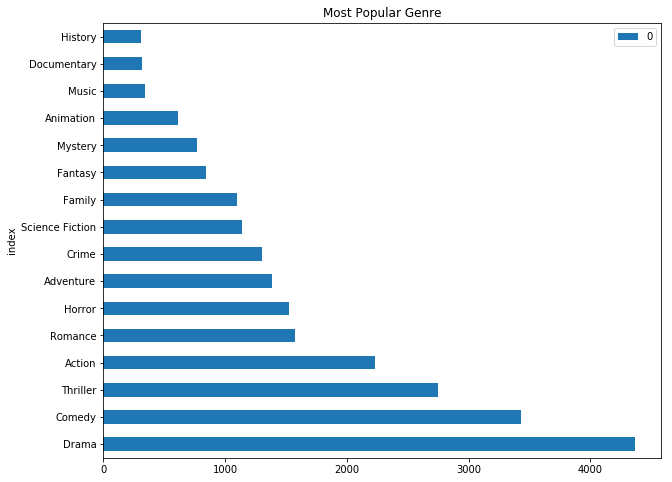

In [30]:
from itertools import chain

#FInding the value counts of the genre column
test = pd.Series(list(chain.from_iterable(df.genres))).value_counts().reset_index().loc[:15]
test.set_index("index", inplace= True)

test.plot(kind = 'barh', figsize = (10,8), title='Most Popular Genre');

From the plot above Most movies have __DRAMA__ as one of the genres. We are tuly a Dramatic generation

### What Company Produces Most of the movies

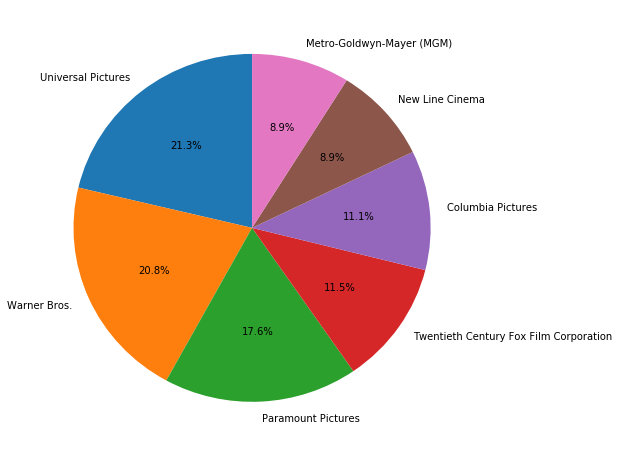

In [71]:

fig,ax = plt.subplots(figsize=(8,8))

test2 = pd.Series(list(chain.from_iterable(df.production_companies))).value_counts().reset_index().loc[:6]
test2.set_index("index", inplace= True)
test2.rename(columns={0: 'hey'}, inplace= True)
test2
ax.pie(list(test2.hey), labels=list(test2.index), autopct='%1.1f%%',
        startangle=90)

plt.show()

From the pie chart above, it can be deduced that;
- Universal Pictures has produced 21.3% of the movies in the dataframe
- Warner Bros is a close second with 20.% percent


From the plot above the most popular studio is __Universal_Pictures__ which is Closelu=y Followed by __Warner Bros__

## Who is the most popular Director

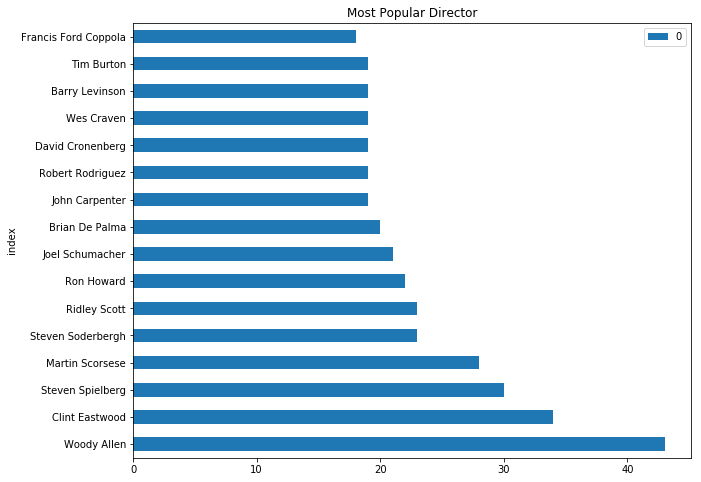

In [33]:
df1['director'] = df1['director'].apply(lambda x: x.split('|'))

df_studio = pd.Series(list(chain.from_iterable(df.director))).value_counts().reset_index().loc[:15]

df_studio.set_index("index", inplace= True)
df_studio.plot(kind = 'barh', figsize = (10,8), title= 'Most Popular Director');

__Woody__ is the most popular director gotten from the dataset

## Revenue Distibution
What is the distribution of revenue in the dataset

Text(0.5,0,'amount in millions')

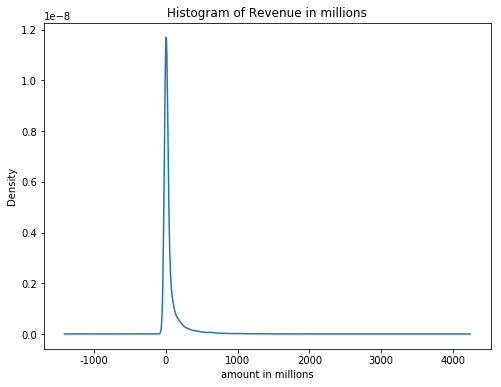

In [34]:


fig, ax = plt.subplots(figsize=(8,6))
df.revenue_adj.plot(kind='kde', ax=ax, title= "Histogram of Revenue in millions")

#setting the xaxis labels
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.set_xticklabels(['{:.0f}'.format(int(x)/1000000) for x in ax.get_xticks().tolist()])
ax.set_xlabel('amount in millions')

In [35]:
df.query('revenue_adj<0')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release-month,release_day


## Highest profit made from the movies
- To do this we create a new column, "net_profit"
- This column is gotten by subtracting revenue -  budget


In [36]:
#Create the column
df1["net_profit"] = df1['revenue_adj']- df1['budget_adj']

df_profit = df1[["net_profit", "original_title", "vote_average"]].sort_values(by='net_profit', ascending=False)


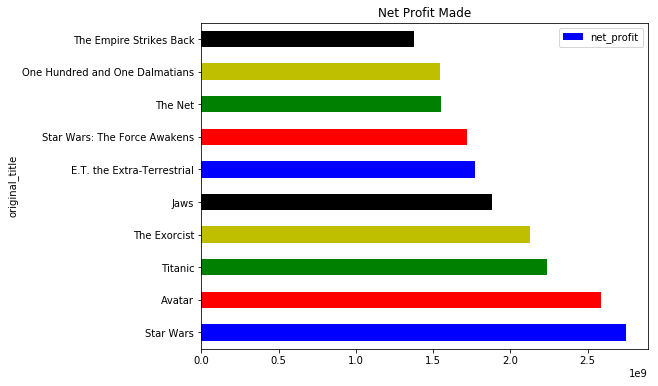

In [37]:
#Plotting the top 5 grossing movies and their names
from itertools import cycle, islice

my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, 10))
df_profit.iloc[:6, :].plot(kind='barh', y= "net_profit", x= "original_title", figsize= (8,6) ,color=my_colors,
                           title= "Net Profit Made");

Star wars is highest grossing movie according to IMBD. The plot below shows the distibution of Profit/Loss made by movies

In [38]:
df2 = df_profit['net_profit'].describe().reset_index()
df2.set_index('index')



,net_profit
index,
count,9772.000
mean,37637103.341
std,131475602.760
min,-413912431.000
25%,0.000
50%,0.000
75%,20296976.463
max,2750136650.919


The percentage of movies that made losses is  37.874% with a mean of 37637103.34


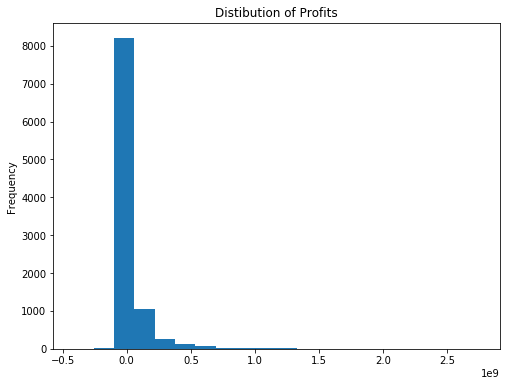

In [39]:

df_percentage = df_profit.loc[df_profit['net_profit'] > 0].shape[0] / df_profit.shape[0] *100
mean = df2.iloc[1, 1]
print(f'The percentage of movies that made losses is {df_percentage: .3f}% with a mean of {mean:.2f}')
df_profit['net_profit'].plot(kind='hist', figsize= (8,6), bins= 20, title= "Distibution of Profits");

## Is there a correlation between net_profit and Vote_average

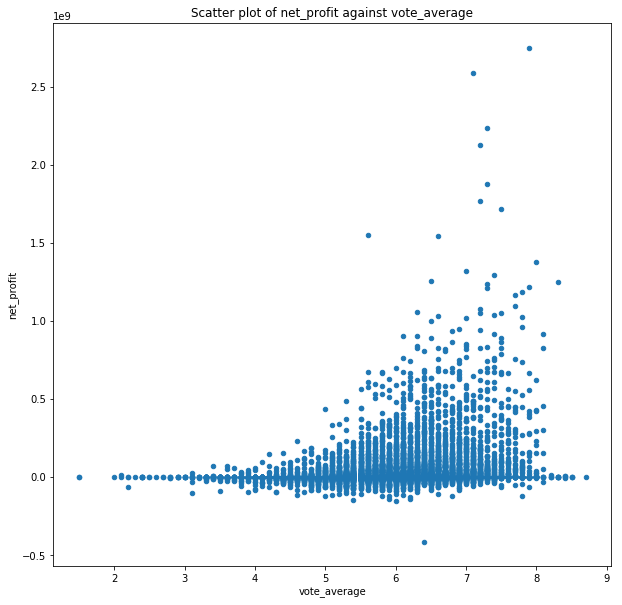

In [40]:

df_profit.plot(kind= 'scatter',y= 'net_profit', x= 'vote_average',
              title= "Scatter plot of net_profit against vote_average", figsize= (10,10));


- There is is a slight positive correlation between the two variable
- A lot of movies was rated 0
- A lot of movies has a net profit of 0

To investigate futher


In [41]:
df.query('revenue==0').shape[0]

5022

The zero profit is caused by a  lot of the revenue rows being equal to 0.
i.e there is no data on this revenue

In [42]:
sum(list(df.revenue == df.revenue_adj))

5234

In [43]:
df_heat= df_profit[["net_profit", "vote_average"]].corr()

df_heat

,net_profit,vote_average
net_profit,1.000,0.217
vote_average,0.217,1.000


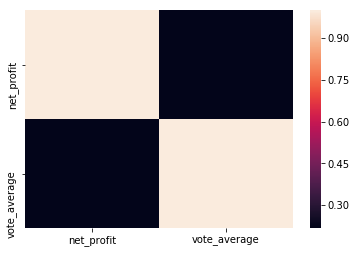

In [44]:
import seaborn as sns

sns.heatmap(df_heat)

There is a slight correlaation beteeen net_profit and vote_average

## Conclusions
After rigorous cleaning and preprocessing of our data, it can be easily inferred that
- There is a slight correlation between net-profit and vote average
- Most movies made a gross loss from their release
- Universal Movies has produces the modt movies
- Drama is the most popular genre
- The most popular Director is Woody


## Limitations
- There is data loss due to the rows and columns of data dropped 
- Data Analysis might not be accurate due to sampling bias
- Correalations between continuos variables might not be accurate because the correlation might not be a linear function

In [72]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0